In [1]:
# Importing standard Qiskit libraries
import numpy as np
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister, Aer, assemble, quantum_info
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.extensions import Initialize


# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://docs.quantum-computing.ibm.com/run/primitives
# result = Sampler().run(circuits).result()

In [2]:
qr = QuantumRegister(3, name =" ")
crz = ClassicalRegister(1, name = "crz")
crx = ClassicalRegister(1, name = "crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

In [3]:
def create_bell_pair(qc, a, b):
    qc.h(a)
    qc.cx(a,b)

In [4]:
create_bell_pair(teleportation_circuit, 1, 2)
print(teleportation_circuit)

                 
   _0: ──────────
       ┌───┐     
   _1: ┤ H ├──■──
       └───┘┌─┴─┐
   _2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════
                 


In [5]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [6]:
teleportation_circuit.barrier() # use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
print(teleportation_circuit)

                  ░      ┌───┐
   _0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
   _1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
   _2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════
                              


In [7]:
def measure_and_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [8]:
measure_and_send(teleportation_circuit, 0, 1)
print(teleportation_circuit)

                  ░      ┌───┐ ░ ┌─┐   
   _0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
   _1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
   _2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
crx: 1/══════════════════════════════╩═
                                     0 


In [9]:
def bob_gates(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx,1)
    qc.z(qubit).c_if(crz, 1)

In [10]:
teleportation_circuit.barrier()
bob_gates(teleportation_circuit, 2, crz, crx)
print(teleportation_circuit)

                  ░      ┌───┐ ░ ┌─┐    ░               
   _0: ───────────░───■──┤ H ├─░─┤M├────░───────────────
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░               
   _1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───────────────
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░  ┌───┐  ┌───┐ 
   _2: ─────┤ X ├─░────────────░──╫──╫──░──┤ X ├──┤ Z ├─
            └───┘ ░            ░  ║  ║  ░  └─╥─┘  └─╥─┘ 
                                  ║  ║       ║   ┌──╨──┐
crz: 1/═══════════════════════════╩══╬═══════╬═══╡ 0x1 ╞
                                  0  ║    ┌──╨──┐└─────┘
crx: 1/══════════════════════════════╩════╡ 0x1 ╞═══════
                                     0    └─────┘       


<IPython.core.display.Latex object>

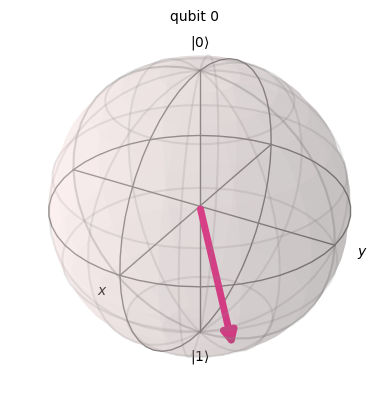

In [17]:
psi = quantum_info.random_statevector(dims = 2)
display(array_to_latex(psi, prefix = "|\\psi\\rangle ="))
plot_bloch_multivector(psi)

In [18]:
init_gate = Initialize(psi)
init_gate.label = "init"

In [19]:
qr = QuantumRegister(3, name =" ")
crz = ClassicalRegister(1, name = "crz")
crx = ClassicalRegister(1, name = "crx")
qc = QuantumCircuit(qr, crz, crx)

qc.append(init_gate, [0])
qc.barrier()

create_bell_pair(qc, 1, 2)
qc.barrier()

alice_gates(qc, 0, 1)

measure_and_send(qc, 0, 1)

bob_gates(qc, 2, crz, crx)

print(qc)

       ┌─────────────────────────────────────────┐ ░            ░      ┌───┐ ░ »
   _0: ┤ init(-0.372-0.15971j,-0.30469-0.86213j) ├─░────────────░───■──┤ H ├─░─»
       └─────────────────────────────────────────┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ »
   _1: ────────────────────────────────────────────░─┤ H ├──■───░─┤ X ├──────░─»
                                                   ░ └───┘┌─┴─┐ ░ └───┘      ░ »
   _2: ────────────────────────────────────────────░──────┤ X ├─░────────────░─»
                                                   ░      └───┘ ░            ░ »
crz: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
crx: 1/════════════════════════════════════════════════════════════════════════»
                                                                               »
«       ┌─┐                 
«   _0: ┤M├─────────────────
«       └╥┘┌─┐              
«   _1: ─╫─┤M├────────

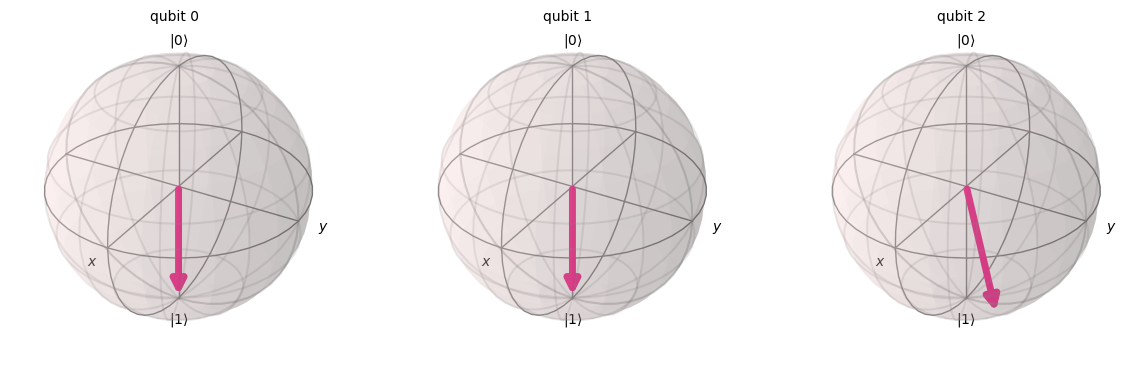

In [20]:
sim = Aer.get_backend("aer_simulator")
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)